In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
DATADIR = 'Dataset2'

IMAGE_SIZE = [128, 128]
 
train_path = DATADIR+'/train'
valid_path = DATADIR+'/test'

In [3]:
labels = ['2S1','BRDM_2','BTR_60','D7','SLICY','T62','ZIL131','ZSU_23_4']

In [4]:
mobilenet = MobileNet(input_shape=IMAGE_SIZE + [3], 
              weights='imagenet',
              include_top=False)

In [5]:
for layer in mobilenet.layers:
    layer.trainable = False

In [6]:
num_classes = glob("Dataset2/train/*")
num_classes

print(len(num_classes))

8


In [7]:
x = Flatten()(mobilenet.output)
prediction = Dense(len(num_classes), activation='softmax')(x)
model = Model(inputs=mobilenet.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 64, 64, 32)       128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 8, 8, 512)        2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 8, 8, 512)         0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 8, 8, 512)        4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 8, 8, 512)        2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 8, 8, 512)         0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 8, 8, 512)         262144    
                                                                 
 conv_pw_9

In [8]:
from tensorflow.keras import optimizers
adam = optimizers.Adam()
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
  )

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   )
 
test_datagen = ImageDataGenerator(rescale = 1./255
                                  )
 
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (IMAGE_SIZE),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
 
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (IMAGE_SIZE),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 6623 images belonging to 8 classes.
Found 953 images belonging to 8 classes.


In [10]:
history = model.fit(
    training_set,
    validation_data = test_set,
    epochs=50,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

Epoch 1/50
207/207 [==============================] - 42s 163ms/step - loss: 0.7304 - accuracy: 0.8090 - val_loss: 0.6231 - val_accuracy: 0.8363
Epoch 2/50
207/207 [==============================] - 29s 142ms/step - loss: 0.3296 - accuracy: 0.9082 - val_loss: 0.4569 - val_accuracy: 0.8835
Epoch 3/50
207/207 [==============================] - 30s 144ms/step - loss: 0.2434 - accuracy: 0.9313 - val_loss: 0.1964 - val_accuracy: 0.9391
Epoch 4/50
207/207 [==============================] - 30s 146ms/step - loss: 0.2945 - accuracy: 0.9250 - val_loss: 0.1799 - val_accuracy: 0.9444
Epoch 5/50
207/207 [==============================] - 30s 145ms/step - loss: 0.2606 - accuracy: 0.9348 - val_loss: 0.6118 - val_accuracy: 0.8730
Epoch 6/50
207/207 [==============================] - 30s 146ms/step - loss: 0.2513 - accuracy: 0.9407 - val_loss: 0.4812 - val_accuracy: 0.8877
Epoch 7/50
207/207 [==============================] - 30s 147ms/step - loss: 0.2300 - accuracy: 0.9496 - val_loss: 0.4766 - val_ac

In [11]:
model.evaluate(test_set)

30/30 [==============================] - 2s 44ms/step - loss: 0.5173 - accuracy: 0.9402


[0.5172842741012573, 0.9401888847351074]

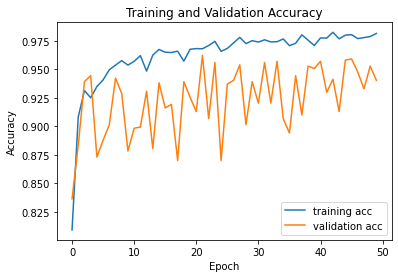

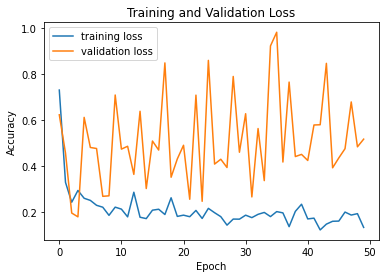

In [12]:
import matplotlib.pyplot as plt
# plot the accuracy
plt.plot(history.history['accuracy'], label='training acc')
plt.plot(history.history['val_accuracy'], label='validation acc')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')
 
# plot the loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

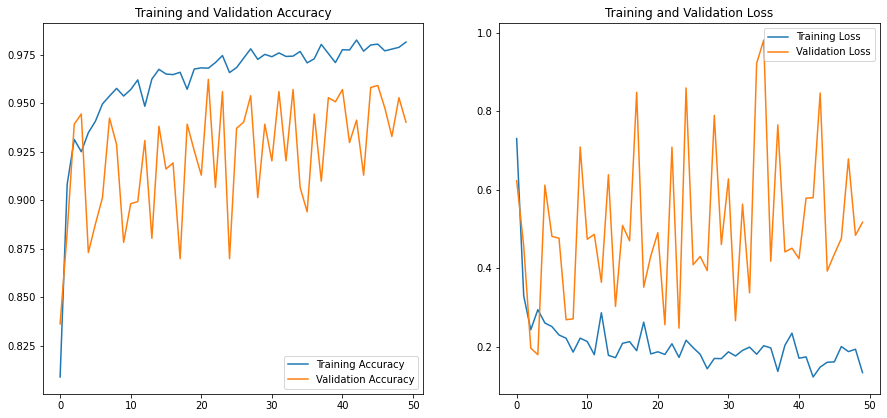

30/30 [==============================] - 2s 52ms/step
              precision    recall  f1-score   support

         2S1       0.10      0.10      0.10       118
      BRDM_2       0.15      0.13      0.14       142
      BTR_60       0.07      0.07      0.07       136
          D7       0.07      0.09      0.08        58
       SLICY       0.17      0.17      0.17       127
         T62       0.12      0.15      0.13       116
      ZIL131       0.11      0.11      0.11       115
    ZSU_23_4       0.10      0.09      0.10       141

    accuracy                           0.12       953
   macro avg       0.11      0.11      0.11       953
weighted avg       0.12      0.12      0.12       953

[[12 14 17  6 15 17 18 19]
 [21 19 13 12 18 18 19 22]
 [20 16  9  7 23 24 19 18]
 [ 9  9  9  5  4  4  5 13]
 [14 20 15 12 22 15 16 13]
 [17 15 21  6 14 17 12 14]
 [12 18 15 11 15 17 13 14]
 [21 19 21 11 16 25 15 13]]


C:\Users\Chlangdiam Sumer\AppData\Local\Temp\ipykernel_388\2377349459.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\Chlangdiam Sumer\AppData\Local\Temp\ipykernel_388\2377349459.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


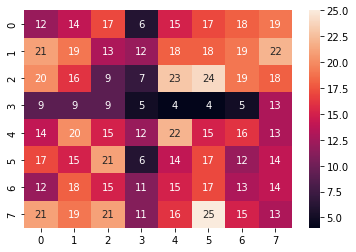

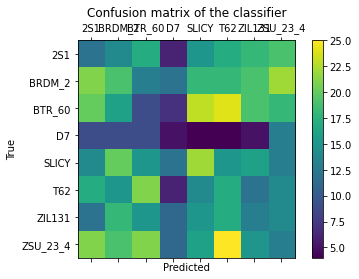

              precision    recall  f1-score   support

         2S1       0.10      0.10      0.10       118
      BRDM_2       0.15      0.13      0.14       142
      BTR_60       0.07      0.07      0.07       136
          D7       0.07      0.09      0.08        58
       SLICY       0.17      0.17      0.17       127
         T62       0.12      0.15      0.13       116
      ZIL131       0.11      0.11      0.11       115
    ZSU_23_4       0.10      0.09      0.10       141

    accuracy                           0.12       953
   macro avg       0.11      0.11      0.11       953
weighted avg       0.12      0.12      0.12       953



In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

from sklearn.metrics import classification_report
import seaborn as sns
predictions = np.argmax(model.predict(test_set), axis=-1)
from sklearn.metrics import confusion_matrix
print(classification_report(test_set.classes, predictions, target_names = ['2S1','BRDM_2','BTR_60','D7','SLICY','T62','ZIL131','ZSU_23_4']))

cm = confusion_matrix(test_set.classes, predictions) 
sns.heatmap(cm, annot= True, fmt='d')

print(cm) 

fig = plt.figure() 

ax = fig.add_subplot(111) 

cax = ax.matshow(cm) 

plt.title('Confusion matrix of the classifier') 

fig.colorbar(cax) 

ax.set_xticklabels([''] + labels) 

ax.set_yticklabels([''] + labels) 

plt.xlabel('Predicted') 

plt.ylabel('True') 

plt.show()





print(classification_report(test_set.classes, predictions, target_names = ['2S1','BRDM_2','BTR_60','D7','SLICY','T62','ZIL131','ZSU_23_4']))

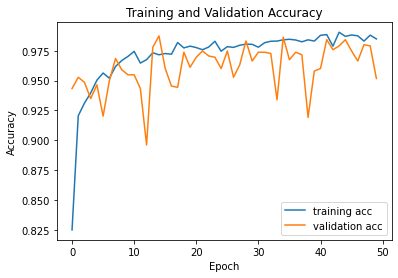

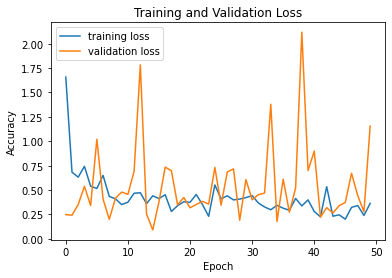

In [11]:
import matplotlib.pyplot as plt
# plot the accuracy
plt.plot(history.history['accuracy'], label='training acc')
plt.plot(history.history['val_accuracy'], label='validation acc')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')
 
# plot the loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

In [12]:
model.evaluate(test_set)

30/30 [==============================] - 2s 51ms/step - loss: 1.1561 - accuracy: 0.9517


[1.15610671043396, 0.9517313838005066]

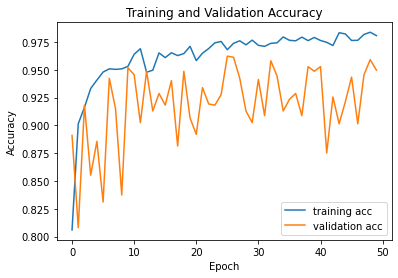

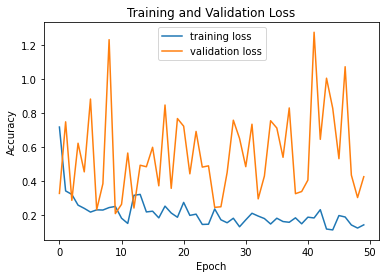

In [12]:
import matplotlib.pyplot as plt
# plot the accuracy
plt.plot(history.history['accuracy'], label='training acc')
plt.plot(history.history['val_accuracy'], label='validation acc')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')
 
# plot the loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

In [13]:
model.evaluate(test_set)

30/30 [==============================] - 2s 58ms/step - loss: 0.4262 - accuracy: 0.9496


[0.4261798858642578, 0.9496327638626099]

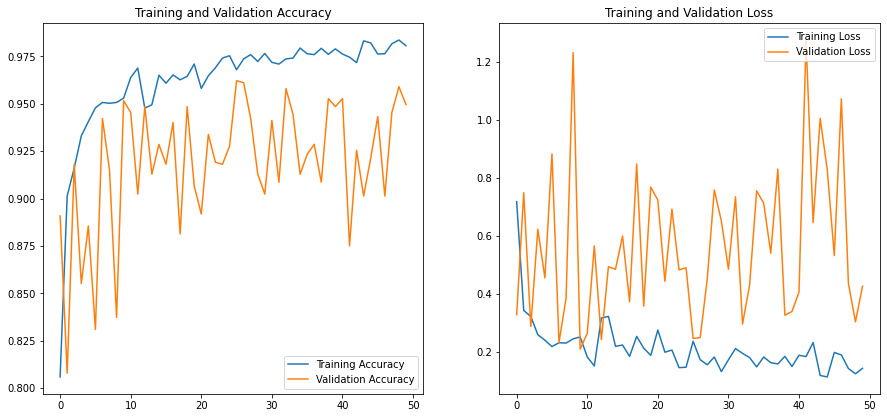

30/30 [==============================] - 2s 56ms/step
              precision    recall  f1-score   support

         2S1       0.10      0.09      0.10       118
      BRDM_2       0.10      0.10      0.10       142
      BTR_60       0.16      0.15      0.16       136
          D7       0.02      0.02      0.02        58
       SLICY       0.12      0.12      0.12       127
         T62       0.10      0.10      0.10       116
      ZIL131       0.18      0.21      0.19       115
    ZSU_23_4       0.10      0.10      0.10       141

    accuracy                           0.12       953
   macro avg       0.11      0.11      0.11       953
weighted avg       0.12      0.12      0.12       953

[[11 20 22  7 11 13 15 19]
 [19 14 26  7 17 17 19 23]
 [21 15 21  9 17 16 15 22]
 [10 12  7  1  6  7  5 10]
 [17 15 10 12 15 21 23 14]
 [ 8 15 15 10 21 12 18 17]
 [10 15 12  7 17 11 24 19]
 [13 29 17  9 22 23 14 14]]


C:\Users\Chlangdiam Sumer\AppData\Local\Temp\ipykernel_4156\2377349459.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\Chlangdiam Sumer\AppData\Local\Temp\ipykernel_4156\2377349459.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


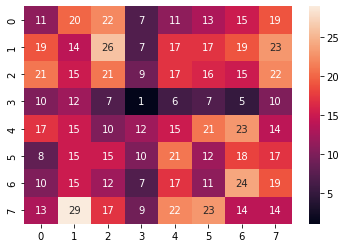

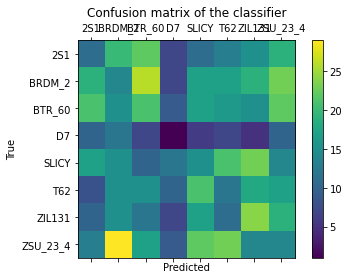

              precision    recall  f1-score   support

         2S1       0.10      0.09      0.10       118
      BRDM_2       0.10      0.10      0.10       142
      BTR_60       0.16      0.15      0.16       136
          D7       0.02      0.02      0.02        58
       SLICY       0.12      0.12      0.12       127
         T62       0.10      0.10      0.10       116
      ZIL131       0.18      0.21      0.19       115
    ZSU_23_4       0.10      0.10      0.10       141

    accuracy                           0.12       953
   macro avg       0.11      0.11      0.11       953
weighted avg       0.12      0.12      0.12       953



In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

from sklearn.metrics import classification_report
import seaborn as sns
predictions = np.argmax(model.predict(test_set), axis=-1)
from sklearn.metrics import confusion_matrix
print(classification_report(test_set.classes, predictions, target_names = ['2S1','BRDM_2','BTR_60','D7','SLICY','T62','ZIL131','ZSU_23_4']))

cm = confusion_matrix(test_set.classes, predictions) 
sns.heatmap(cm, annot= True, fmt='d')

print(cm) 

fig = plt.figure() 

ax = fig.add_subplot(111) 

cax = ax.matshow(cm) 

plt.title('Confusion matrix of the classifier') 

fig.colorbar(cax) 

ax.set_xticklabels([''] + labels) 

ax.set_yticklabels([''] + labels) 

plt.xlabel('Predicted') 

plt.ylabel('True') 

plt.show()





print(classification_report(test_set.classes, predictions, target_names = ['2S1','BRDM_2','BTR_60','D7','SLICY','T62','ZIL131','ZSU_23_4']))

In [5]:
train = get_data(r"C:\Users\Chlangdiam Sumer\OneDrive\Desktop\M. Tech Thesis\4th Sem\Models(Code)\Dataset2\train")
val = get_data(r"C:\Users\Chlangdiam Sumer\OneDrive\Desktop\M. Tech Thesis\4th Sem\Models(Code)\Dataset2\test")
l = []
for i in train:
    if(i[1] == 0):
        l.append("2S1")
    if(i[1]==1):
        l.append("BRDM_2")
    if(i[1]==2):
        l.append("BTR_60")
    if(i[1]==3):
        l.append("D7")
    if(i[1]==4):
        l.append("SLICY")
    if(i[1]==5):
        l.append("T62")
    if(i[1]==6):
        l.append("ZIL131")
    if(i[1]==7):
        l.append("ZSU_23_4")
# sns.set_style('darkgrid')
# sns.countplot(l)

C:\Users\Chlangdiam Sumer\AppData\Local\Temp\ipykernel_14372\942685356.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [6]:
x_train = []
y_train = []
x_val = []
y_valA = []

In [7]:
for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_valA.append(label)

In [8]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

In [9]:
x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_valA)

In [10]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input

In [11]:
def create_model():
    mobilenet = MobileNet(input_shape=[img_size,img_size]+[3], weights='imagenet', include_top=False)
    for layer in mobilenet.layers:
        layer.trainable = False
    
    x = Flatten()(mobilenet.output)
    x = Dense(512, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    prediction = Dense(8, activation='softmax')(x)
    # create a model object
    model = Model(inputs=mobilenet.input, outputs=prediction)
    return model

In [12]:
# vgg19 = VGG19(input_shape=[img_size,img_size]+[3], weights='imagenet', include_top=False)

In [13]:
# don't train existing weights
# for layer in vgg19.layers:
#     layer.trainable = False

In [14]:
# our layers - you can add more if you want
# x = Flatten()(vgg19.output)

In [15]:
# prediction = Dense(8, activation='softmax')(x)

# create a model object
# model = Model(inputs=vgg19.input, outputs=prediction)

In [16]:
# model = create_model()
# model.summary()

In [17]:
# # Building the Model Architecture
# model = Sequential()


# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
# model.add(Conv2D(512, kernel_size=(1, 1), activation='relu'))
# model.add(Conv2D(512, kernel_size=(1, 1), activation='relu'))
# model.add(MaxPooling2D(pool_size=(1, 1)))

# model.add(Conv2D(512, kernel_size=(1, 1), activation='relu'))
# model.add(Conv2D(512, kernel_size=(1, 1), activation='relu'))
# model.add(Conv2D(512, kernel_size=(1, 1), activation='relu'))
# model.add(MaxPooling2D(pool_size=(1, 1)))

# model.add(Flatten())
# model.add(Dense(4000,activation="relu"))
# model.add(Dense(1000,activation="relu"))
# model.add(Dense(100,activation="relu"))
# model.add(Dense(8, activation="sigmoid"))

In [17]:
model = create_model()
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.SGD(lr=0.000001),
    metrics=['accuracy']    
)

model.summary()


train_ds=tf.data.Dataset.from_tensor_slices((x_train,y_train))
test_ds=tf.data.Dataset.from_tensor_slices((x_val,y_val))

def process_image(image,label):
    image=tf.image.per_image_standardization(image)
    image=tf.image.resize(image,(64,64))
    
    return image,label



train_ds_size=tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size=tf.data.experimental.cardinality(test_ds).numpy()
print('Train size:',train_ds_size)
print('Test size:',test_ds_size)

train_ds=(train_ds
          .map(process_image)
          .shuffle(buffer_size=train_ds_size)
          .batch(batch_size=64,drop_remainder=True)
         )
test_ds=(test_ds
          .map(process_image)
          .shuffle(buffer_size=test_ds_size)
          .batch(batch_size=64,drop_remainder=True)
         )

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 32, 32, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 32, 32, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 32, 32, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 32, 32, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 32, 32, 32)       128       
 ation)                                                      

                                                                 
 conv_pw_8 (Conv2D)          (None, 4, 4, 512)         262144    
                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 4, 4, 512)        2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 4, 4, 512)         0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 4, 4, 512)        4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 4, 4, 512)        2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 4, 4, 512)         0         
                                                                 
 conv_pw_9

C:\Users\Chlangdiam Sumer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Train size: 6623
Test size: 953


In [18]:
from keras.optimizers import Adam
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

C:\Users\Chlangdiam Sumer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [19]:
history = model.fit(x_train,y_train,epochs = 100 , validation_data = (x_val, y_val))

Epoch 1/100


C:\Users\Chlangdiam Sumer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


207/207 [==============================] - 10s 14ms/step - loss: 2.1202 - accuracy: 0.0974 - val_loss: 2.1072 - val_accuracy: 0.1112
Epoch 2/100
207/207 [==============================] - 2s 10ms/step - loss: 2.0833 - accuracy: 0.1286 - val_loss: 2.0727 - val_accuracy: 0.1480
Epoch 3/100
207/207 [==============================] - 2s 9ms/step - loss: 2.0511 - accuracy: 0.1791 - val_loss: 2.0418 - val_accuracy: 0.2015
Epoch 4/100
207/207 [==============================] - 2s 9ms/step - loss: 2.0216 - accuracy: 0.2369 - val_loss: 2.0130 - val_accuracy: 0.2592
Epoch 5/100
207/207 [==============================] - 2s 9ms/step - loss: 1.9937 - accuracy: 0.2920 - val_loss: 1.9859 - val_accuracy: 0.3116
Epoch 6/100
207/207 [==============================] - 2s 9ms/step - loss: 1.9670 - accuracy: 0.3310 - val_loss: 1.9594 - val_accuracy: 0.3221
Epoch 7/100
207/207 [==============================] - 2s 10ms/step - loss: 1.9408 - accuracy: 0.3563 - val_loss: 1.9337 - val_accuracy: 0.3431
Epoch 8

Epoch 58/100
207/207 [==============================] - 2s 9ms/step - loss: 1.0888 - accuracy: 0.6399 - val_loss: 1.1093 - val_accuracy: 0.6097
Epoch 59/100
207/207 [==============================] - 2s 9ms/step - loss: 1.0809 - accuracy: 0.6428 - val_loss: 1.1027 - val_accuracy: 0.6128
Epoch 60/100
207/207 [==============================] - 2s 9ms/step - loss: 1.0732 - accuracy: 0.6462 - val_loss: 1.0964 - val_accuracy: 0.6139
Epoch 61/100
207/207 [==============================] - 2s 9ms/step - loss: 1.0657 - accuracy: 0.6480 - val_loss: 1.0902 - val_accuracy: 0.6139
Epoch 62/100
207/207 [==============================] - 2s 9ms/step - loss: 1.0583 - accuracy: 0.6502 - val_loss: 1.0842 - val_accuracy: 0.6180
Epoch 63/100
207/207 [==============================] - 2s 9ms/step - loss: 1.0511 - accuracy: 0.6521 - val_loss: 1.0782 - val_accuracy: 0.6170
Epoch 64/100
207/207 [==============================] - 2s 9ms/step - loss: 1.0441 - accuracy: 0.6530 - val_loss: 1.0724 - val_accuracy:

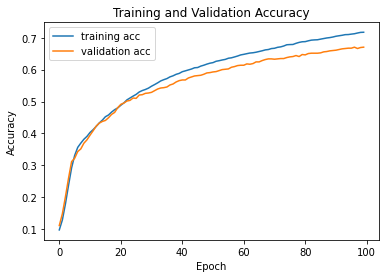

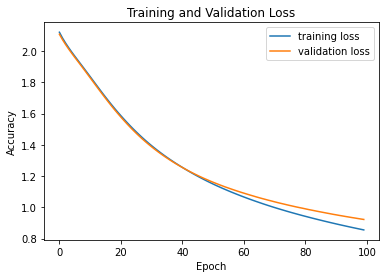

In [20]:
import matplotlib.pyplot as plt
# plot the accuracy
plt.plot(history.history['accuracy'], label='training acc')
plt.plot(history.history['val_accuracy'], label='validation acc')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')
 
# plot the loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

In [21]:
model.evaluate(x_val, y_val)

30/30 [==============================] - 0s 7ms/step - loss: 0.9220 - accuracy: 0.6705


[0.9219502806663513, 0.6705141663551331]